<a href="https://colab.research.google.com/github/SarahY89/Predicting-Electricity-Prices/blob/main/Predicting_Electricity_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Electricity Prices**

Predict the daily price variation of electricity futures contracts in England and Scotland.

# loading Libraries

In [2]:

# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

# Preprocessing Libraries
from sklearn.preprocessing import RobustScaler

# Model training libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from collections import Counter
from imblearn.under_sampling import NearMiss               # Undersampling
from imblearn.over_sampling import RandomOverSampler       # Oversampling
from imblearn.combine import SMOTETomek                    # Both Undersampling & Oversampling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For checking acuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# Data Exploration and Data Cleaning

In [3]:
test_data = pd.read_csv('/content/test.csv')
train_data =pd.read_csv('/content/train.csv')
# preview of data

test_data.head(5)


,ID,DAY_ID,COUNTRY,EN_CONSUMPTION,SC_CONSUMPTION,EN_SC_EXCHANGE,EN_SC_EXCHANGE.1,EN_NET_EXPORT,SC_NET_EXPORT,EN_NET_IMPORT,...,SC_RESIDUAL_LOAD,EN_RAIN,SC_RAIN,EN_WIND,SC_WIND,EN_TEMP,SC_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1905,922,FR,0.850673,1.754694,2.119081,-2.119081,-0.152048,-2.652947,0.152048,...,1.657977,-0.611095,-1.545250,0.599079,1.081256,-0.674632,-1.623146,0.325328,2.461414,1.121652
1,1560,640,FR,-0.163169,-1.000510,-0.844216,0.844216,-1.248088,-0.483415,1.248088,...,-0.916060,0.028255,-0.704780,-0.715431,-0.720297,0.366905,0.281706,0.107630,0.326670,0.726900
2,978,749,FR,1.095720,0.708132,0.972202,-0.972202,NaN,NaN,NaN,...,0.846909,0.870326,-0.094561,-0.266383,-0.936848,-1.188318,-0.171556,-0.790452,-0.070311,-0.493792
3,430,70,DE,0.962114,0.978202,-0.488579,0.488579,-0.009066,0.350190,0.009066,...,0.722904,-0.737855,-0.451625,-0.870904,-0.652968,0.877630,0.114314,-1.091242,-0.420936,-1.187919
4,1277,612,FR,0.084725,-0.529281,-0.703383,0.703383,-0.867186,0.701708,0.867186,...,-0.524358,-0.410014,-0.656610,-0.412824,-0.341855,-1.674868,-0.149335,1.015038,0.697738,1.847625


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['DAY_ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['EN_CONSUMPTION'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['DAY_ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['EN_CONSUMPTION'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_8, *['COUNTRY'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_9, *[[['index', 'ID'], ['ID', 'DAY_ID'], ['DAY_ID', 'EN_CONSUMPTION'], ['EN_CONSUMPTION', 'SC_CONSUMPTION']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_10, *['index', 'COUNTRY'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_11, *['ID', 'COUNTRY'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['DAY_ID', 'COUNTRY'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['EN_CONSUMPTION', 'COUNTRY'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_14, *['index', 'ID', 'COUNTRY'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_15, *['index', 'DAY_ID', 'COUNTRY'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_16, *['index', 'EN_CONSUMPTION', 'COUNTRY'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_17, *['index', 'SC_CONSUMPTION', 'COUNTRY'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_18, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_19, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_20, *['DAY_ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_21, *['EN_CONSUMPTION'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_22, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_23, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_24, *['DAY_ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_25, *['EN_CONSUMPTION'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_26, *['COUNTRY'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_27, *[[['index', 'ID'], ['ID', 'DAY_ID'], ['DAY_ID', 'EN_CONSUMPTION'], ['EN_CONSUMPTION', 'SC_CONSUMPTION']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_28, *['index', 'COUNTRY'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_29, *['ID', 'COUNTRY'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_30, *['DAY_ID', 'COUNTRY'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_31, *['EN_CONSUMPTION', 'COUNTRY'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_32, *['index', 'ID', 'COUNTRY'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_33, *['index', 'DAY_ID', 'COUNTRY'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_34, *['index', 'EN_CONSUMPTION', 'COUNTRY'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_35, *['index', 'SC_CONSUMPTION', 'COUNTRY'], **{})
chart

In [4]:
train_data.head(5)

,ID,DAY_ID,COUNTRY,EN_CONSUMPTION,SC_CONSUMPTION,EN_SC_EXCHANGE,EN_SC_EXCHANGE.1,EN_NET_EXPORT,SC_NET_EXPORT,EN_NET_IMPORT,...,EN_RAIN,SC_RAIN,EN_WIND,SC_WIND,EN_TEMP,SC_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
0,1675,809,FR,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,...,NaN,NaN,NaN,NaN,NaN,NaN,0.876984,0.819520,1.320373,0.077687
1,136,292,DE,0.359496,-0.219398,0.001369,-0.001369,0.474434,-0.029744,-0.474434,...,-0.126422,1.852433,-0.859444,-0.879027,0.678797,-0.081514,-0.087966,0.078601,-0.375356,1.007261
2,522,188,DE,0.556084,-0.264298,1.083886,-1.083886,0.462565,-0.231322,-0.462565,...,1.090211,0.916461,1.696387,0.581391,-0.392780,-0.588684,0.793277,0.216866,0.932713,-0.152640
3,1292,1027,FR,-0.093290,-0.874992,-2.233178,2.233178,-1.585888,1.151177,1.585888,...,0.495799,-0.529800,-0.716488,-0.969511,0.770310,-0.101407,-0.351418,0.196313,-0.404838,-2.788408
4,37,1058,DE,0.406000,-0.634804,-1.513080,1.513080,-1.173137,1.316583,1.173137,...,0.392121,-1.648699,-0.653331,-0.432017,1.208224,0.776142,0.807354,1.170828,2.566665,0.084096


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_36, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_37, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_38, *['DAY_ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_39, *['EN_CONSUMPTION'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_40, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_41, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_42, *['DAY_ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_43, *['EN_CONSUMPTION'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_44, *['COUNTRY'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_45, *[[['index', 'ID'], ['ID', 'DAY_ID'], ['DAY_ID', 'EN_CONSUMPTION'], ['EN_CONSUMPTION', 'SC_CONSUMPTION']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_46, *['index', 'COUNTRY'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_47, *['ID', 'COUNTRY'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_48, *['DAY_ID', 'COUNTRY'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_49, *['EN_CONSUMPTION', 'COUNTRY'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_50, *['index', 'ID', 'COUNTRY'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_51, *['index', 'DAY_ID', 'COUNTRY'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_52, *['index', 'EN_CONSUMPTION', 'COUNTRY'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_53, *['index', 'SC_CONSUMPTION', 'COUNTRY'], **{})
chart

In [5]:
test_data.describe()

,ID,DAY_ID,EN_CONSUMPTION,SC_CONSUMPTION,EN_SC_EXCHANGE,EN_SC_EXCHANGE.1,EN_NET_EXPORT,SC_NET_EXPORT,EN_NET_IMPORT,SC_NET_IMPORT,...,SC_RESIDUAL_LOAD,EN_RAIN,SC_RAIN,EN_WIND,SC_WIND,EN_TEMP,SC_TEMP,GAS_RET,COAL_RET,CARBON_RET
count,400.000000,400.000000,400.000000,400.000000,394.000000,394.000000,367.000000,383.000000,367.000000,383.000000,...,400.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,400.000000,400.000000,400.000000
mean,1089.157500,601.757500,0.422966,0.005579,-0.117583,0.117583,-0.234939,-0.146567,0.234939,0.146567,...,-0.116122,-0.118741,0.086518,0.123157,0.130545,-0.029404,0.007376,-0.030924,0.091778,0.114773
std,617.077243,348.832415,0.706657,0.961821,0.963578,0.963578,0.964935,1.072252,0.964935,1.072252,...,0.951285,0.917557,1.224134,1.078073,1.065294,0.929477,0.952264,1.121532,1.022850,1.167679
min,2.000000,1.000000,-2.265563,-1.462350,-2.212659,-2.634831,-2.464849,-2.825331,-1.902134,-1.874276,...,-1.552772,-2.128531,-1.545250,-1.319222,-1.531520,-3.494385,-3.238233,-4.269256,-5.392852,-4.281790
25%,580.750000,294.500000,-0.043326,-0.707637,-0.845439,-0.576607,-0.940761,-0.883043,-0.465162,-0.702661,...,-0.806116,-0.676720,-0.485651,-0.681080,-0.698770,-0.577735,-0.664664,-0.790531,-0.454466,-0.536534
50%,1085.500000,605.500000,0.348298,-0.403379,-0.164624,0.164624,-0.299681,-0.016927,0.299681,0.016927,...,-0.458687,-0.303346,-0.212982,-0.261571,-0.261132,-0.105398,-0.063596,-0.011623,0.045626,0.098322
75%,1630.250000,901.250000,0.958659,0.687231,0.576607,0.845439,0.465162,0.702661,0.940761,0.883043,...,0.487575,0.308184,0.172090,0.624706,0.827451,0.546385,0.785115,0.701231,0.697656,0.647153
max,2146.000000,1213.000000,2.033851,2.632105,2.634831,2.212659,1.902134,1.874276,2.464849,2.825331,...,2.537454,4.216460,9.473201,5.085624,3.499060,2.771601,2.439156,3.840718,3.746576,5.471818


In [6]:
train_data.describe()

,ID,DAY_ID,EN_CONSUMPTION,SC_CONSUMPTION,EN_SC_EXCHANGE,EN_SC_EXCHANGE.1,EN_NET_EXPORT,SC_NET_EXPORT,EN_NET_IMPORT,SC_NET_IMPORT,...,EN_RAIN,SC_RAIN,EN_WIND,SC_WIND,EN_TEMP,SC_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
count,1094.000000,1094.000000,1094.000000,1094.000000,1075.000000,1075.000000,1003.000000,1041.000000,1003.000000,1041.000000,...,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,1066.763254,588.243144,0.429078,-0.029396,-0.155742,0.155742,-0.264159,-0.045446,0.264159,0.045446,...,-0.008445,-0.005035,0.104513,0.120395,0.023563,0.008778,0.090685,0.050736,0.067983,0.050955
std,618.528352,343.766745,0.661165,0.903102,0.972897,0.972897,0.955051,1.076380,0.955051,1.076380,...,1.006175,0.981255,1.048691,1.051324,0.987581,1.021730,1.087650,1.038094,1.072550,0.962189
min,0.000000,0.000000,-2.077774,-1.456829,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,-1.951516,...,-2.128531,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.706442,-4.281790,-6.519268
25%,531.500000,292.250000,-0.027346,-0.724195,-0.904623,-0.647758,-0.997321,-0.843185,-0.449166,-0.834720,...,-0.629062,-0.527772,-0.640639,-0.660441,-0.634046,-0.645716,-0.541564,-0.458038,-0.517698,-0.211150
50%,1075.500000,585.500000,0.358261,-0.390642,-0.156136,0.156136,-0.329230,0.156117,0.329230,-0.156117,...,-0.260395,-0.231347,-0.261571,-0.223610,0.006600,-0.013710,0.034933,0.066273,0.033874,-0.002955
75%,1587.500000,881.000000,0.918392,0.614371,0.647758,0.904623,0.449166,0.834720,0.997321,0.843185,...,0.361552,0.153973,0.638035,0.768803,0.673510,0.676436,0.657406,0.630335,0.591783,0.235224
max,2145.000000,1215.000000,2.033851,3.300640,2.634831,2.856874,2.279619,1.951516,2.464849,2.825331,...,7.756118,7.217889,5.085624,4.965028,2.858758,2.817239,5.674778,3.683777,5.471818,7.786578


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                400 non-null    int64  
 1   DAY_ID            400 non-null    int64  
 2   COUNTRY           400 non-null    object 
 3   EN_CONSUMPTION    400 non-null    float64
 4   SC_CONSUMPTION    400 non-null    float64
 5   EN_SC_EXCHANGE    394 non-null    float64
 6   EN_SC_EXCHANGE.1  394 non-null    float64
 7   EN_NET_EXPORT     367 non-null    float64
 8   SC_NET_EXPORT     383 non-null    float64
 9   EN_NET_IMPORT     367 non-null    float64
 10  SC_NET_IMPORT     383 non-null    float64
 11  EN_GAS            400 non-null    float64
 12  SC_GAS            400 non-null    float64
 13  EN_COAL           400 non-null    float64
 14  SC_COAL           400 non-null    float64
 15  EN_HYDRO          400 non-null    float64
 16  SC_HYDRO          400 non-null    float64
 1

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1094 non-null   int64  
 1   DAY_ID            1094 non-null   int64  
 2   COUNTRY           1094 non-null   object 
 3   EN_CONSUMPTION    1094 non-null   float64
 4   SC_CONSUMPTION    1094 non-null   float64
 5   EN_SC_EXCHANGE    1075 non-null   float64
 6   EN_SC_EXCHANGE.1  1075 non-null   float64
 7   EN_NET_EXPORT     1003 non-null   float64
 8   SC_NET_EXPORT     1041 non-null   float64
 9   EN_NET_IMPORT     1003 non-null   float64
 10  SC_NET_IMPORT     1041 non-null   float64
 11  EN_GAS            1094 non-null   float64
 12  SC_GAS            1094 non-null   float64
 13  EN_COAL           1094 non-null   float64
 14  SC_COAL           1094 non-null   float64
 15  EN_HYDRO          1094 non-null   float64
 16  SC_HYDRO          1094 non-null   float64


In [9]:
# Null % check amongst columns
round((test_data.isnull().sum()/len(test_data)*100),2)

ID                  0.00
DAY_ID              0.00
COUNTRY             0.00
EN_CONSUMPTION      0.00
SC_CONSUMPTION      0.00
EN_SC_EXCHANGE      1.50
EN_SC_EXCHANGE.1    1.50
EN_NET_EXPORT       8.25
SC_NET_EXPORT       4.25
EN_NET_IMPORT       8.25
SC_NET_IMPORT       4.25
EN_GAS              0.00
SC_GAS              0.00
EN_COAL             0.00
SC_COAL             0.00
EN_HYDRO            0.00
SC_HYDRO            0.00
EN_NUCLEAR          0.00
SC_NUCLEAR          0.00
EN_SOLAR            0.00
SC_SOLAR            0.00
EN_WINDPOW          0.00
SC_WINDPOW          0.00
EN_LIGNITE          0.00
EN_RESIDUAL_LOAD    0.00
SC_RESIDUAL_LOAD    0.00
EN_RAIN             6.75
SC_RAIN             6.75
EN_WIND             6.75
SC_WIND             6.75
EN_TEMP             6.75
SC_TEMP             6.75
GAS_RET             0.00
COAL_RET            0.00
CARBON_RET          0.00
dtype: float64

In [10]:
# Null % check amongst columns
round((train_data.isnull().sum()/len(train_data)*100),2)

ID                  0.00
DAY_ID              0.00
COUNTRY             0.00
EN_CONSUMPTION      0.00
SC_CONSUMPTION      0.00
EN_SC_EXCHANGE      1.74
EN_SC_EXCHANGE.1    1.74
EN_NET_EXPORT       8.32
SC_NET_EXPORT       4.84
EN_NET_IMPORT       8.32
SC_NET_IMPORT       4.84
EN_GAS              0.00
SC_GAS              0.00
EN_COAL             0.00
SC_COAL             0.00
EN_HYDRO            0.00
SC_HYDRO            0.00
EN_NUCLEAR          0.00
SC_NUCLEAR          0.00
EN_SOLAR            0.00
SC_SOLAR            0.00
EN_WINDPOW          0.00
SC_WINDPOW          0.00
EN_LIGNITE          0.00
EN_RESIDUAL_LOAD    0.00
SC_RESIDUAL_LOAD    0.00
EN_RAIN             6.12
SC_RAIN             6.12
EN_WIND             6.12
SC_WIND             6.12
EN_TEMP             6.12
SC_TEMP             6.12
GAS_RET             0.00
COAL_RET            0.00
CARBON_RET          0.00
TARGET              0.00
dtype: float64

In [11]:
# DF.corr to show correlation of values
test_data.corr()

,ID,DAY_ID,EN_CONSUMPTION,SC_CONSUMPTION,EN_SC_EXCHANGE,EN_SC_EXCHANGE.1,EN_NET_EXPORT,SC_NET_EXPORT,EN_NET_IMPORT,SC_NET_IMPORT,...,SC_RESIDUAL_LOAD,EN_RAIN,SC_RAIN,EN_WIND,SC_WIND,EN_TEMP,SC_TEMP,GAS_RET,COAL_RET,CARBON_RET
ID,1.000000,0.009115,0.054793,-0.026036,0.153214,-0.153214,0.043339,-0.202163,-0.043339,0.202163,...,-0.052963,0.061338,0.023354,0.291963,0.312709,-0.011145,0.056008,0.026427,0.100684,0.038061
DAY_ID,0.009115,1.000000,0.031010,0.033269,0.145703,-0.145703,0.133070,-0.069013,-0.133070,0.069013,...,0.032848,0.067726,0.007206,0.073382,0.062377,0.027746,-0.004038,-0.045529,-0.106809,-0.065067
EN_CONSUMPTION,0.054793,0.031010,1.000000,0.778765,0.511154,-0.511154,0.553793,-0.240088,-0.553793,0.240088,...,0.725274,0.171177,-0.067915,0.296213,0.146887,0.083825,-0.208647,-0.081320,0.109913,0.079788
SC_CONSUMPTION,-0.026036,0.033269,0.778765,1.000000,0.556352,-0.556352,0.531708,-0.327579,-0.531708,0.327579,...,0.969865,0.016451,-0.100909,0.041246,-0.056124,-0.030949,-0.323231,-0.116166,0.064006,-0.037883
EN_SC_EXCHANGE,0.153214,0.145703,0.511154,0.556352,1.000000,-1.000000,0.678865,-0.687954,-0.678865,0.687954,...,0.552565,0.036293,-0.090336,0.380499,0.181837,0.024366,-0.128040,-0.074163,0.009889,-0.004027
EN_SC_EXCHANGE.1,-0.153214,-0.145703,-0.511154,-0.556352,-1.000000,1.000000,-0.678865,0.687954,0.678865,-0.687954,...,-0.552565,-0.036293,0.090336,-0.380499,-0.181837,-0.024366,0.128040,0.074163,-0.009889,0.004027
EN_NET_EXPORT,0.043339,0.133070,0.553793,0.531708,0.678865,-0.678865,1.000000,-0.200608,-1.000000,0.200608,...,0.449209,0.146561,-0.037966,0.371920,0.151840,0.140601,-0.000743,-0.091406,-0.054774,-0.103506
SC_NET_EXPORT,-0.202163,-0.069013,-0.240088,-0.327579,-0.687954,0.687954,-0.200608,1.000000,0.200608,-1.000000,...,-0.358846,0.096255,0.081617,-0.224649,-0.123470,0.045819,0.144058,0.056055,0.002949,-0.015501
EN_NET_IMPORT,-0.043339,-0.133070,-0.553793,-0.531708,-0.678865,0.678865,-1.000000,0.200608,1.000000,-0.200608,...,-0.449209,-0.146561,0.037966,-0.371920,-0.151840,-0.140601,0.000743,0.091406,0.054774,0.103506
SC_NET_IMPORT,0.202163,0.069013,0.240088,0.327579,0.687954,-0.687954,0.200608,-1.000000,-0.200608,1.000000,...,0.358846,-0.096255,-0.081617,0.224649,0.123470,-0.045819,-0.144058,-0.056055,-0.002949,0.015501


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_54, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_55, *['DAY_ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_56, *['EN_CONSUMPTION'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_57, *['SC_CONSUMPTION'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_58, *['ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_59, *['DAY_ID'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_60, *['EN_CONSUMPTION'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_61, *['SC_CONSUMPTION'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_62, *[[['ID', 'DAY_ID'], ['DAY_ID', 'EN_CONSUMPTION'], ['EN_CONSUMPTION', 'SC_CONSUMPTION'], ['SC_CONSUMPTION', 'EN_SC_EXCHANGE']]], **{})
chart

In [12]:
correlations = test_data.corr(method='pearson')
print(correlations['EN_CONSUMPTION'].sort_values(ascending=False).to_string())

EN_CONSUMPTION      1.000000
SC_CONSUMPTION      0.778765
SC_RESIDUAL_LOAD    0.725274
SC_GAS              0.638804
SC_NUCLEAR          0.561216
EN_NET_EXPORT       0.553793
SC_COAL             0.543219
EN_SC_EXCHANGE      0.511154
EN_WINDPOW          0.491649
EN_COAL             0.487807
EN_LIGNITE          0.407272
SC_HYDRO            0.370594
SC_WINDPOW          0.332250
EN_WIND             0.296213
SC_NET_IMPORT       0.240088
EN_RESIDUAL_LOAD    0.214672
EN_GAS              0.214068
EN_NUCLEAR          0.204025
EN_RAIN             0.171177
SC_WIND             0.146887
COAL_RET            0.109913
EN_TEMP             0.083825
CARBON_RET          0.079788
ID                  0.054793
DAY_ID              0.031010
SC_RAIN            -0.067915
GAS_RET            -0.081320
SC_TEMP            -0.208647
SC_NET_EXPORT      -0.240088
EN_HYDRO           -0.338429
EN_SC_EXCHANGE.1   -0.511154
SC_SOLAR           -0.530025
EN_NET_IMPORT      -0.553793
EN_SOLAR           -0.626942


# Distribution of Key Variables (ENGLAND)-Test_data


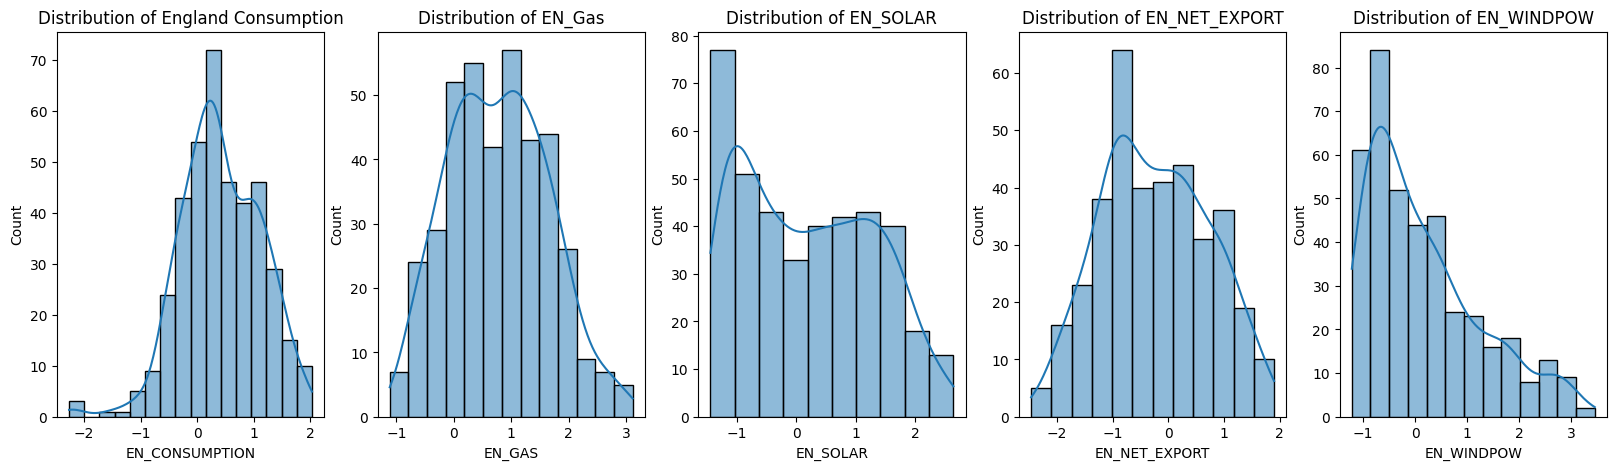

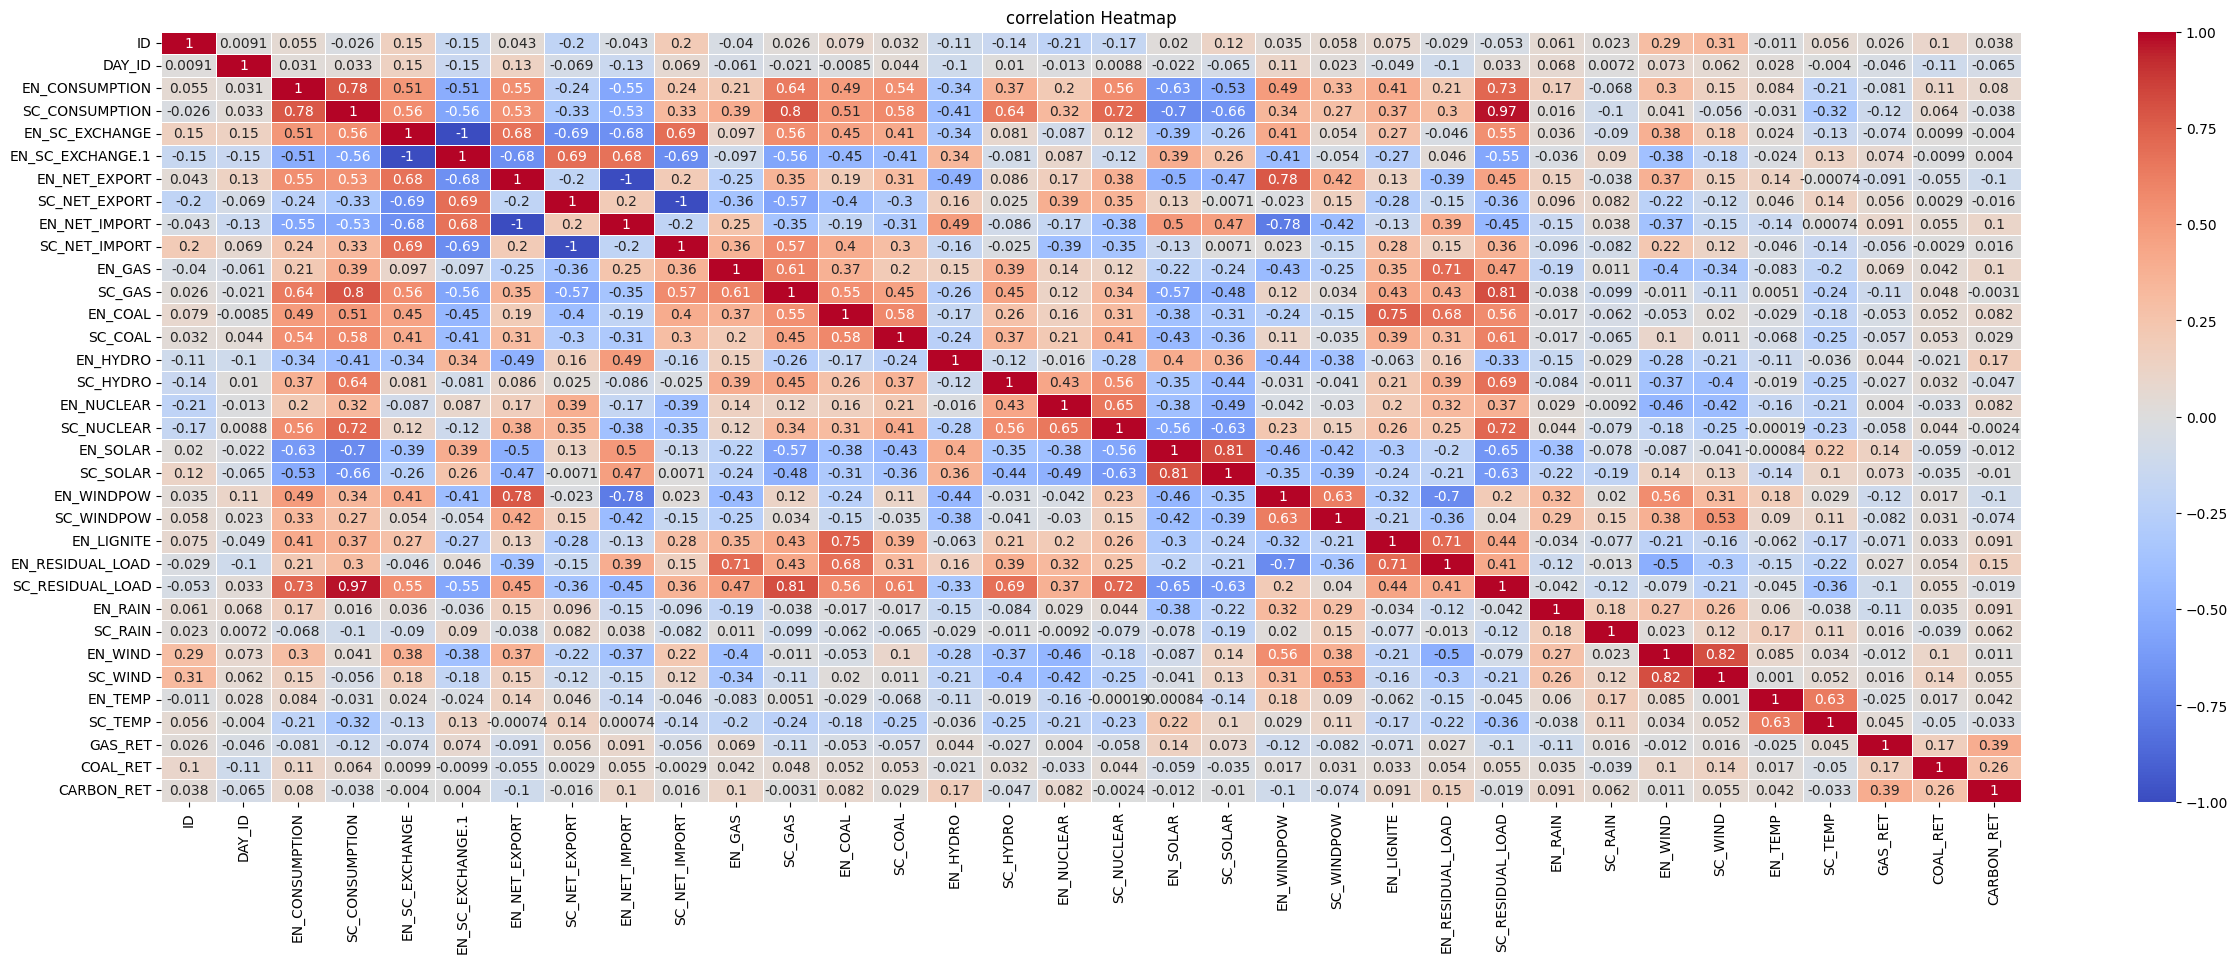

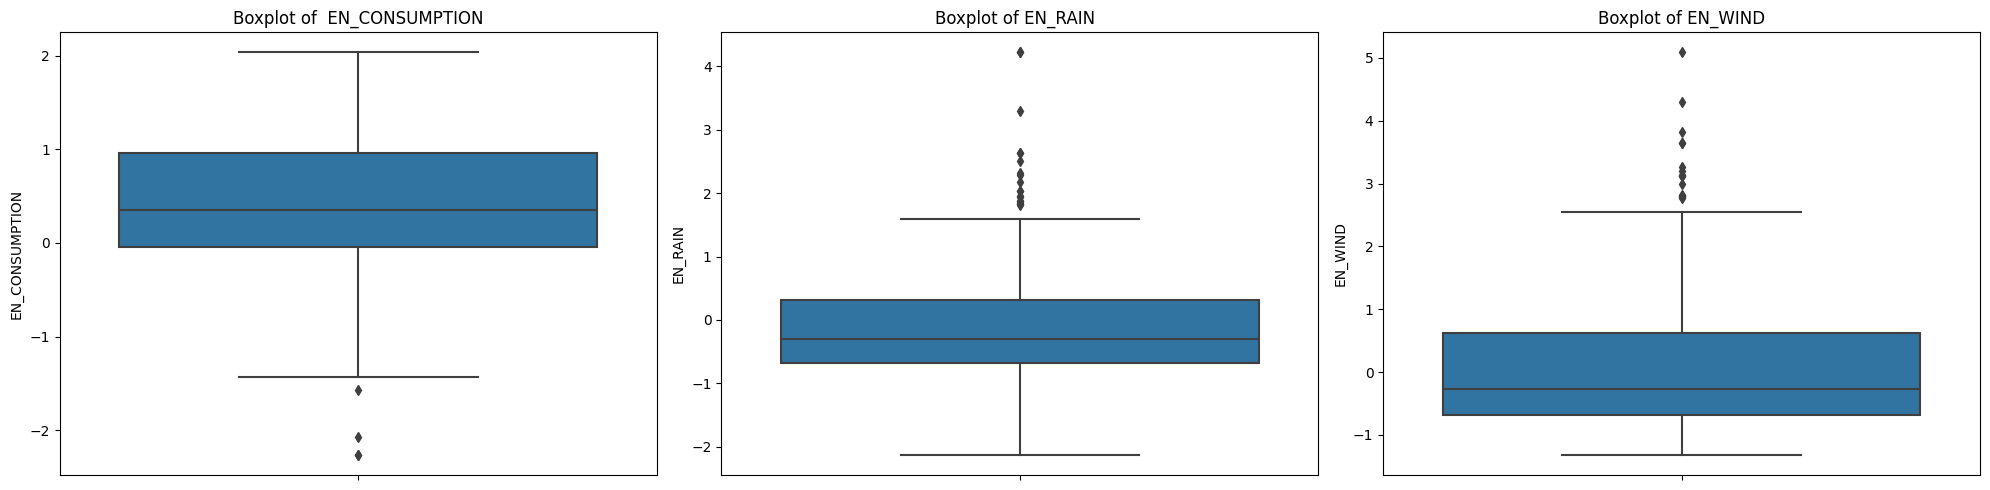

In [17]:
fig,ax =plt.subplots (1,5, figsize =(20,5))
sns.histplot(test_data['EN_CONSUMPTION'], ax=ax[0],kde=True)
ax[0].set_title('Distribution of England Consumption')

sns.histplot(test_data['EN_GAS'], ax=ax[1],kde=True)
ax[1].set_title('Distribution of EN_Gas')

sns.histplot(test_data['EN_SOLAR'], ax=ax[2],kde=True)
ax[2].set_title('Distribution of EN_SOLAR')

sns.histplot(test_data['EN_NET_EXPORT'], ax=ax[3],kde=True)
ax[3].set_title('Distribution of EN_NET_EXPORT')

sns.histplot(test_data['EN_WINDPOW'], ax=ax[4],kde=True)
ax[4].set_title('Distribution of EN_WINDPOW')

#CORRELATION HEATMAP
Correlation_matrix = test_data.corr()
plt.figure(figsize=(30,10))
sns.heatmap(Correlation_matrix, annot=True, cmap= 'coolwarm', linewidths =0.5)
plt.title('correlation Heatmap')
plt.show()

#BOXPLOTS FOR KEY VARIABLES
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(y=test_data['EN_CONSUMPTION'], ax=ax[0])
ax[0].set_title('Boxplot of  EN_CONSUMPTION')

sns.boxplot(y=test_data['EN_RAIN'], ax=ax[1])
ax[1].set_title('Boxplot of EN_RAIN  ')

sns.boxplot(y=test_data['EN_WIND'], ax=ax[2])
ax[2].set_title('Boxplot of EN_WIND')

plt.tight_layout()
plt.show()


 # Distribution of Key Variables (SCOTLAND)


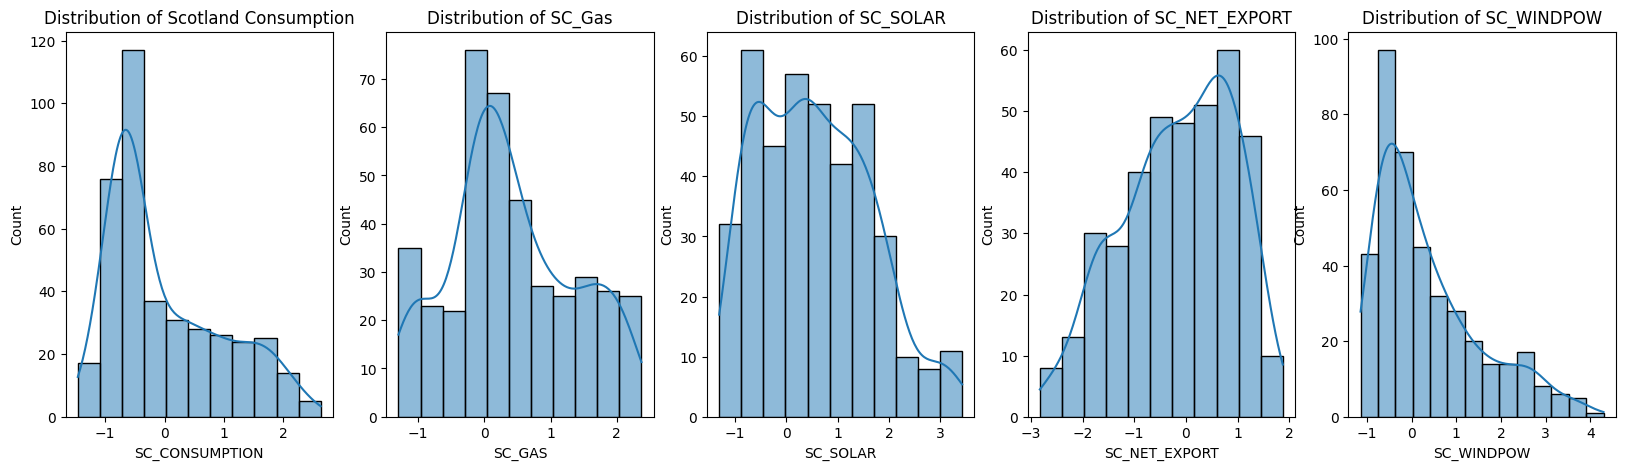

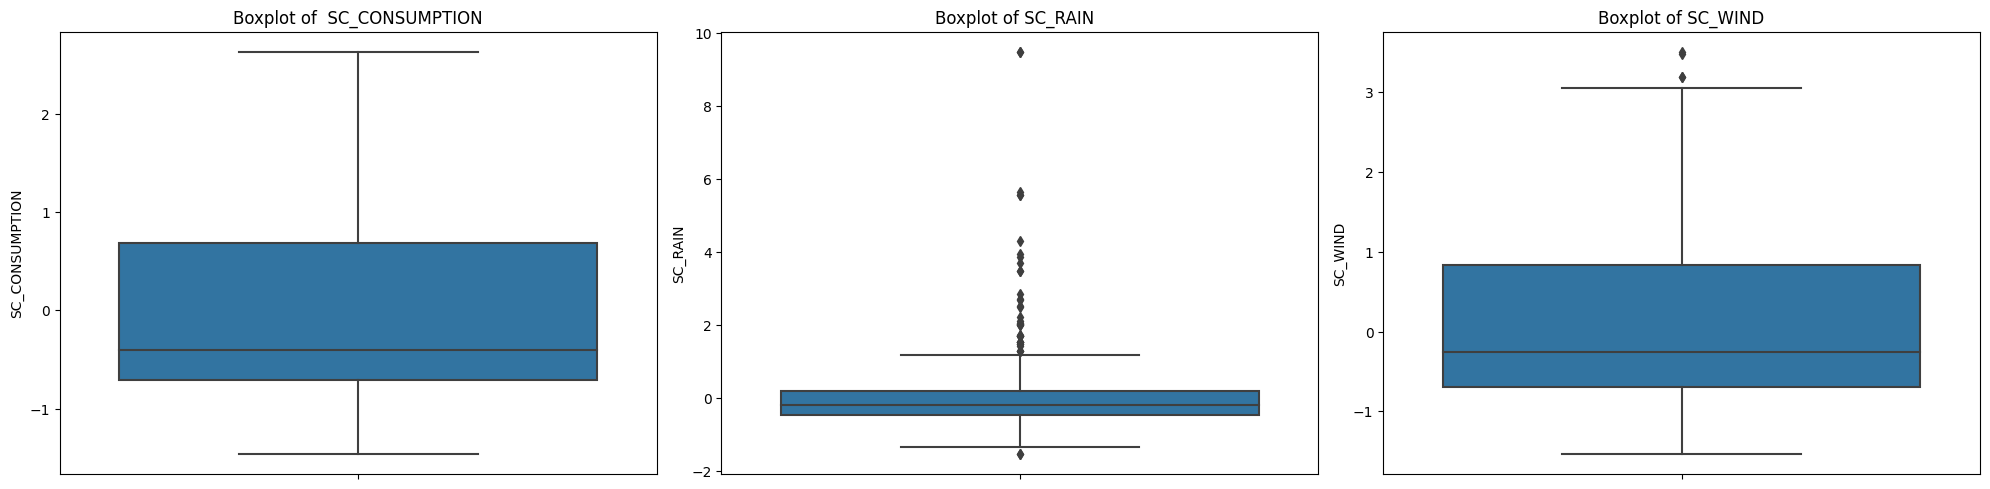

In [18]:
fig,ax =plt.subplots (1,5, figsize =(20,5))
sns.histplot(test_data['SC_CONSUMPTION'], ax=ax[0],kde=True)
ax[0].set_title('Distribution of Scotland Consumption')

sns.histplot(test_data['SC_GAS'], ax=ax[1],kde=True)
ax[1].set_title('Distribution of SC_Gas')

sns.histplot(test_data['SC_SOLAR'], ax=ax[2],kde=True)
ax[2].set_title('Distribution of SC_SOLAR')

sns.histplot(test_data['SC_NET_EXPORT'], ax=ax[3],kde=True)
ax[3].set_title('Distribution of SC_NET_EXPORT')

sns.histplot(test_data['SC_WINDPOW'], ax=ax[4],kde=True)
ax[4].set_title('Distribution of SC_WINDPOW')

#BOXPLOTS FOR KEY VARIABLES
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(y=test_data['SC_CONSUMPTION'], ax=ax[0])
ax[0].set_title('Boxplot of  SC_CONSUMPTION')

sns.boxplot(y=test_data['SC_RAIN'], ax=ax[1])
ax[1].set_title('Boxplot of SC_RAIN  ')

sns.boxplot(y=test_data['SC_WIND'], ax=ax[2])
ax[2].set_title('Boxplot of SC_WIND')

plt.tight_layout()
plt.show()


# Distribution of variables train dataset

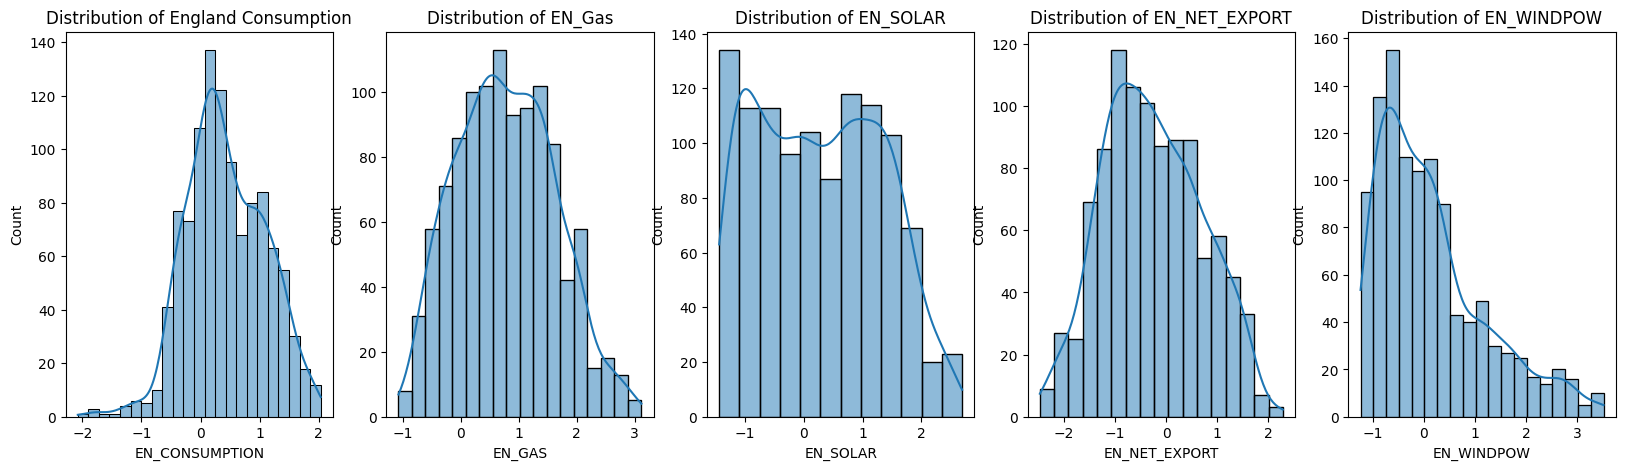

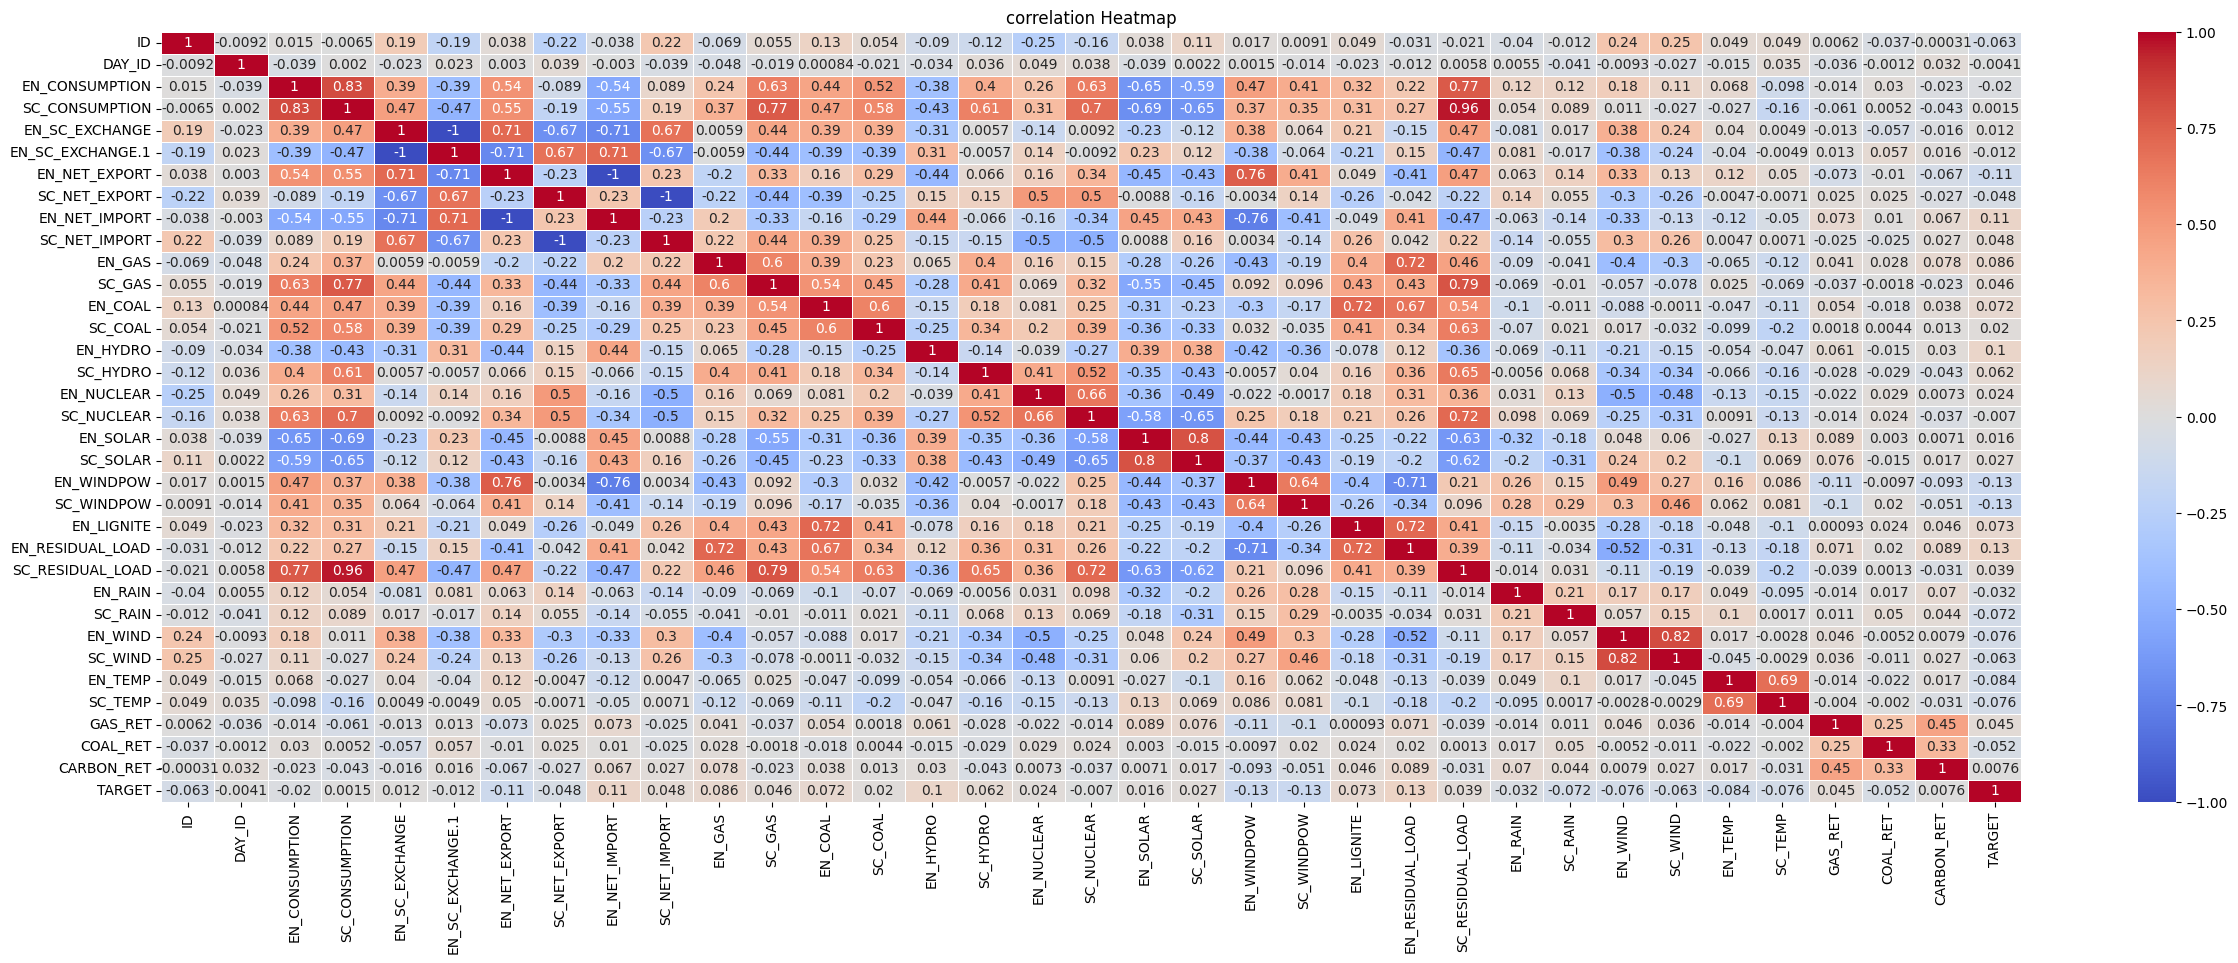

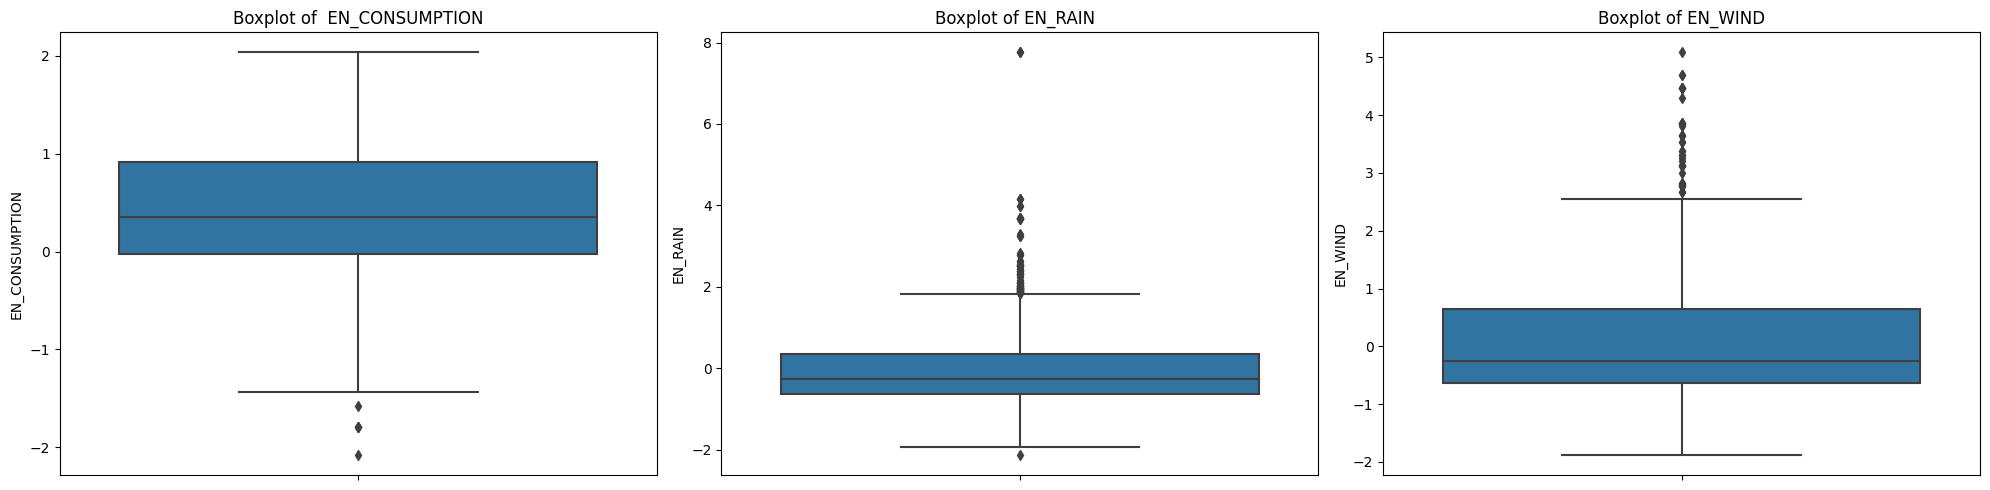

In [19]:
fig,ax =plt.subplots (1,5, figsize =(20,5))
sns.histplot(train_data['EN_CONSUMPTION'], ax=ax[0],kde=True)
ax[0].set_title('Distribution of England Consumption')

sns.histplot(train_data['EN_GAS'], ax=ax[1],kde=True)
ax[1].set_title('Distribution of EN_Gas')

sns.histplot(train_data['EN_SOLAR'], ax=ax[2],kde=True)
ax[2].set_title('Distribution of EN_SOLAR')

sns.histplot(train_data['EN_NET_EXPORT'], ax=ax[3],kde=True)
ax[3].set_title('Distribution of EN_NET_EXPORT')

sns.histplot(train_data['EN_WINDPOW'], ax=ax[4],kde=True)
ax[4].set_title('Distribution of EN_WINDPOW')

#CORRELATION HEATMAP
Correlation_matrix = train_data.corr()
plt.figure(figsize=(30,10))
sns.heatmap(Correlation_matrix, annot=True, cmap= 'coolwarm', linewidths =0.5)
plt.title('correlation Heatmap')
plt.show()

#BOXPLOTS FOR KEY VARIABLES
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(y=train_data['EN_CONSUMPTION'], ax=ax[0])
ax[0].set_title('Boxplot of  EN_CONSUMPTION')

sns.boxplot(y=train_data['EN_RAIN'], ax=ax[1])
ax[1].set_title('Boxplot of EN_RAIN  ')

sns.boxplot(y=train_data['EN_WIND'], ax=ax[2])
ax[2].set_title('Boxplot of EN_WIND')

plt.tight_layout()
plt.show()


# Regression Analysis (Predict _electricity consumption in england )